In [1]:
import sys
sys.path.append('../')

In [2]:
from benji_girgs import generation, plotting, utils
import networkit as nk
import networkx as nx
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [72]:
import imp
import benji_girgs
imp.reload(benji_girgs)
imp.reload(benji_girgs.utils)
imp.reload(benji_girgs.generation)
from benji_girgs import utils
from benji_girgs import generation

In [3]:
n=3000
d=2
tau=2.5
alpha=1.2
g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha)

/cluster/home/bdayan/girgs/benji_src/benji_girgs/generation.py:114: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


In [4]:
dists = utils.weight_thresh_all_pairs_distances(g, weights, 1.3)

In [5]:
dists

array([[0, 3, 5, ..., 4, 2, 4],
       [3, 0, 4, ..., 4, 4, 4],
       [5, 4, 0, ..., 5, 5, 5],
       ...,
       [4, 4, 5, ..., 0, 3, 4],
       [2, 4, 5, ..., 3, 0, 3],
       [4, 4, 5, ..., 4, 3, 0]])

In [6]:
cn_r = utils.fractal_dimensions(dists)

In [7]:
cn_r

[0.0010111223458038423,
 0.009002052884762692,
 0.0534199426009335,
 0.24241198639580844,
 0.6911296994209026,
 0.9760762324968594,
 1.0003758515386423,
 1.0010090796743982]

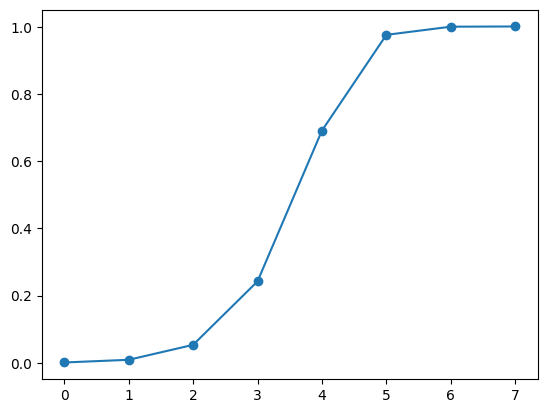

In [9]:
plt.plot(cn_r, marker='o')

In [12]:
InteractiveShell.ast_node_interactivity = "last"

g total number of nodes: 10000, largest comp number of nodes: 10000
g total number of nodes: 10000, largest comp number of nodes: 10000


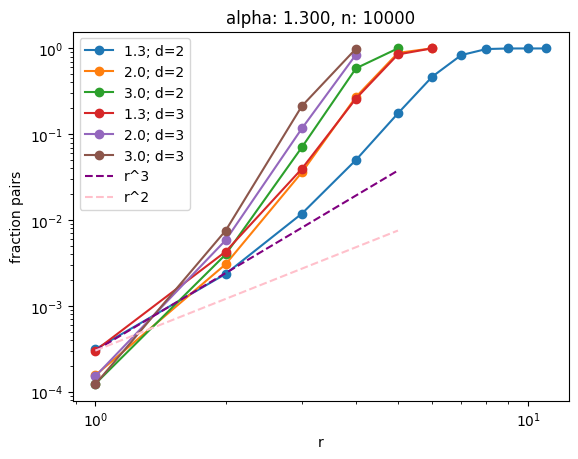

In [83]:
n=10000
d=2
tau=2.5
alpha=1.3
threshs = [1.3, 2.0, 3.0]
g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha)
g_old = g
g = utils.get_largest_component(g)
print(f'g total number of nodes: {g_old.numberOfNodes()}, largest comp number of nodes: {g.numberOfNodes()}')

cn_rs = []
for thresh in threshs:
    dists = utils.weight_thresh_all_pairs_distances(g, weights, thresh)
    cn_r = utils.fractal_dimensions(dists)
    cn_rs.append(cn_r)
    
    
plt.xscale('log')
plt.yscale('log')
for cn_r, thresh in zip(cn_rs, threshs):
    rs = list(range(1, len(cn_r) + 1))
    plt.plot(rs, cn_r, marker='o', label=f'{thresh}; d=2')
plt.xlabel('r')
plt.ylabel('fraction pairs')



d=3

g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha)
g_old = g
g = utils.get_largest_component(g)
print(f'g total number of nodes: {g_old.numberOfNodes()}, largest comp number of nodes: {g.numberOfNodes()}')


cn_rs = []
for thresh in threshs:
    dists = utils.weight_thresh_all_pairs_distances(g, weights, thresh)
    cn_r = utils.fractal_dimensions(dists)
    cn_rs.append(cn_r)
    
    

for cn_r, thresh in zip(cn_rs, threshs):
    rs = list(range(1, len(cn_r) + 1))
    plt.plot(rs, cn_r, marker='o', label=f'{thresh}; d=3')

    
rs = np.array(list(range(1, max(*[len(cn_r) for cn_r in cn_rs]))))
cn_r = cn_rs[0]
plt.plot(rs, cn_r[0] * rs**3, color='purple', linestyle='--', label='r^3')
plt.plot(rs, cn_r[0] * rs**2, color='pink', linestyle='--', label='r^2')

plt.title(f'alpha: {alpha:.3f}, n: {n}')
plt.legend()